In [1]:
from __future__ import absolute_import

import sys, os, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.append(currentdir)
sys.path.append(parentdir)
sys.path.append(parentdir + '/models')

from models import model
from models import unet

In [2]:
import os, sys, math, random, itertools
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import transforms
import matplotlib.pyplot as plt

# Read the image and transform to `k * 256` x `l * 265` size

In [3]:
img = Image.open('../color/Top_NoMagic_00000000.png')

In [19]:
T = transforms.Compose([
    transforms.Resize((2 * 256, 3 * 256)),
    transforms.ToTensor(),
])

In [20]:
img_tensor = T(img)
img_tensor.shape

torch.Size([3, 512, 768])

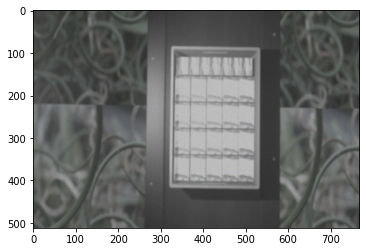

In [21]:
plt.imshow(np.dstack(img_tensor.numpy()))

# Check the model output

In [22]:
model = unet.UNet(downsample=6, in_channels=3, out_channels=3)

In [23]:
prediction = model(img_tensor.view(-1, *img_tensor.shape))
prediction.shape

torch.Size([1, 3, 512, 768])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


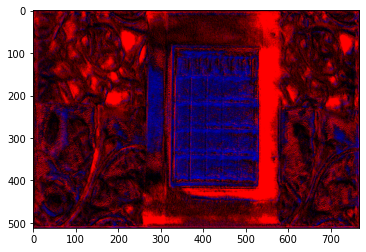

In [24]:
plt.imshow(np.dstack(prediction.detach().numpy().squeeze()))